# Preprocessing

### Load all climate data (Precip & Soil Moisture) station F102 - F108

In [1]:
%run -i function.py


In [2]:

df_station = pd.read_excel(os.getcwd()+"/Inputs/Physiography Data.xlsx",
                           engine="openpyxl", sheet_name=None, skiprows=1,)

# Print the name of each sheets


5 Stations with different soil profiles and slope.


## Load all the precipitation in the stations

In [3]:
station_name = list(df_station.keys())[:5]
station_name


['F102', 'F106', 'F107', 'F108', 'F110']

## Precipitation of all the stations


In [4]:
precipitation = df_station['F102'].iloc[:, :2].set_index('Date')

for i in station_name:
    precipitation = precipitation.merge(df_station[i].iloc[:, :2].set_index(
        'Date').rename(columns={'mm': i}), left_index=True, right_index=True)
precipitation = precipitation.drop(columns='mm')

precipitation = precipitation.replace([-996,-999], np.nan)
precipitation.describe()


,F102,F106,F107,F108,F110
count,5616.000000,5648.000000,3981.000000,5661.000000,5642.000000
mean,2.125741,2.066737,2.039206,2.019604,2.144523
std,7.847348,7.646972,7.632055,7.489740,8.103167
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,142.750000,171.450000,170.940000,160.270000,171.450000


In [5]:
# Load the excel
data = pd.read_excel(os.getcwd()+"/Inputs/Physiography Data.xlsx",
                     engine="openpyxl", sheet_name=None, )
data.keys()


dict_keys(['F102', 'F106', 'F107', 'F108', 'F110', 'MESONET HINT_TEMP', 'Discharge', 'Soils_Slopes'])

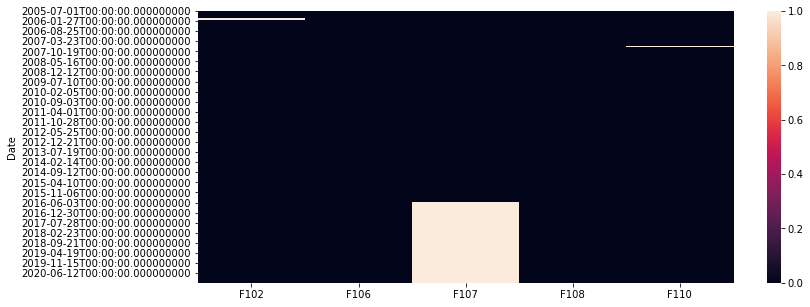

In [6]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.heatmap(precipitation.isna())


,Micronet Stations,Slope %,Texture,No. Layers,Max Depth (mm)
0,f102,5.9,LFS-FSL-SL-L,4,1829
1,f106,5.5,FSL-SICL,2,1727
2,f107,0.5,FSL-SICL,2,1727
3,f108,3.7,FSL-SICL,2,1727
4,f110,2.8,FSL-SICL,2,1727


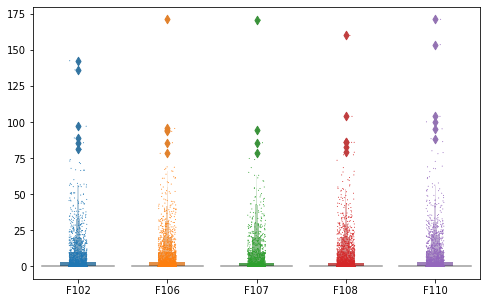

In [7]:
fig,ax = plt.subplots(figsize=(8,5))
sns.stripplot(data=precipitation, size= 1)
sns.boxenplot(data=precipitation)
data['Soils_Slopes']


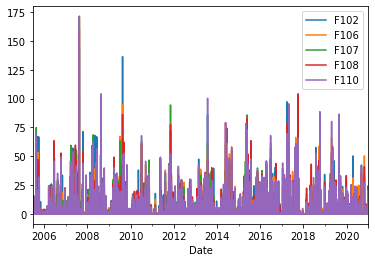

In [8]:
precipitation.plot()

In [9]:
precipitation.describe()


,F102,F106,F107,F108,F110
count,5616.000000,5648.000000,3981.000000,5661.000000,5642.000000
mean,2.125741,2.066737,2.039206,2.019604,2.144523
std,7.847348,7.646972,7.632055,7.489740,8.103167
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,142.750000,171.450000,170.940000,160.270000,171.450000


Stations with the least missing precipitaion values are preferred for analysis listed below in descending order
- F106
- F110
- F102
- F107

Check the correlation between the precipitation at the different station 

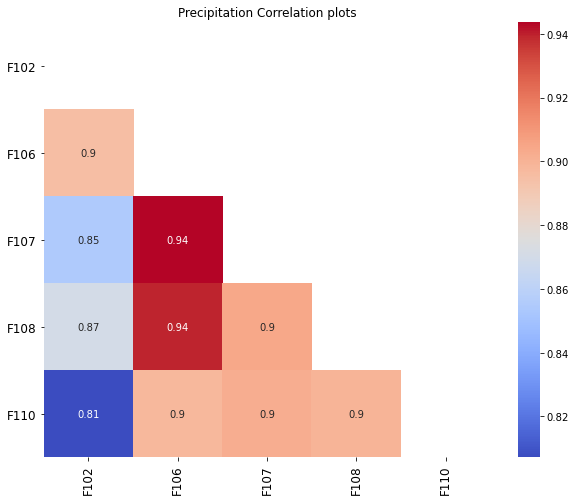

In [10]:
corr_plot(precipitation, 'Precipitation Correlation plots')


We choose the station with the most complete precipitation "F108".
<mark>F108</mark> has a high correlation with <mark>F106</mark> station that happens to be the next complete.
They both have the same soil property but different slopes


In [11]:
data["Soils_Slopes"]


,Micronet Stations,Slope %,Texture,No. Layers,Max Depth (mm)
0,f102,5.9,LFS-FSL-SL-L,4,1829
1,f106,5.5,FSL-SICL,2,1727
2,f107,0.5,FSL-SICL,2,1727
3,f108,3.7,FSL-SICL,2,1727
4,f110,2.8,FSL-SICL,2,1727


## Load the Temperature data

We have a single temperature data for all the stations located in sheetnamae <mark> MESONET HINT_TEMP</mark>

In [12]:
# Obtain the Mesonet Temperature Min and Max temperature
Temperature = data["MESONET HINT_TEMP"].set_index('Date')
#Temperature.rename(columns={"TMAX (C)" : "TMAX ", 'TMIN (C)': "TMAX"})

# Merge the temperature and precipitation for the F108 station
df_F108 = Temperature.merge(precipitation['F108'], how='inner', on='Date')
df_F108 = df_F108.rename(columns={'F108': "PRCP (mm)"})


In [13]:
status(df_F108)


Features     Observations    No of missing   % Missing
----------  --------------  ---------------  ------------
TMAX (C)         5663              0         0.0%
TMIN (C)         5663              0         0.0%
PRCP (mm)        5663              2         0.0%


In [14]:
# replace all odd values due to instrument reading and linear interpolate
df_F108 = df_F108.replace(-571.105400, np.nan)
df_F108 = df_F108.interpolate(method='linear', limit_direction='both')
status(df_F108)


Features     Observations    No of missing   % Missing
----------  --------------  ---------------  ------------
TMAX (C)         5663              0         0.0%
TMIN (C)         5663              0         0.0%
PRCP (mm)        5663              0         0.0%


## Merge the soil properties, temperature and precipitation 

In [15]:
df_F108 = df_F108.merge(df_station['F108'].drop(columns='mm'),
                        how='inner', on='Date')

# set the date as the index of the dataframe
df_F108 = df_F108.set_index('Date')

# Rename the soil columns
df_F108 = df_F108.rename(columns={"5 cm": "SM 5 (cm)",
                                  "25 cm": "SM 25 (cm)",
                                  "45 cm": "SM 45 (cm)"})


### Deal with the missing values.

In [16]:
# replace all the -998  adn -996 with np.nan
df_F108 = df_F108.replace([-998, -996], np.nan)

status(df_F108)


Features     Observations    No of missing   % Missing
----------  --------------  ---------------  ------------
TMAX (C)         5663              0         0.0%
TMIN (C)         5663              0         0.0%
PRCP (mm)        5663              0         0.0%
SM 5 (cm)        5663             88         1.6%
SM 25 (cm)       5663             88         1.6%
SM 45 (cm)       5663             88         1.6%


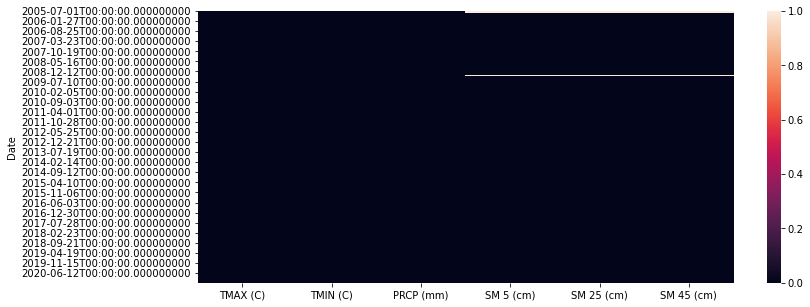

In [17]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.heatmap(df_F108.isna())


In [18]:
display_side_by_side([sequence_of_missing_values(df_F108, 'SM 5 (cm)'),
                     sequence_of_missing_values(df_F108, 'SM 25 (cm)'), sequence_of_missing_values(df_F108, 'SM 45 (cm)')],
                     ['5cm', '25cm', '45cm']
                     )


,Start_Date,End_Date,Frequency
0,'2005-07-01','2005-08-25',56
1,'2009-03-01','2009-03-30',30
2,'2013-08-19','2013-08-20',2
,Start_Date,End_Date,Frequency
0,'2005-07-01','2005-08-25',56
1,'2009-03-01','2009-03-30',30
2,'2013-08-19','2013-08-20',2
,Start_Date,End_Date,Frequency
0,'2005-07-01','2005-08-25',56
1,'2009-03-01','2009-03-30',30


Drop the first 56 rows till 2005-08-26 and linear interpolate the dataframe

In [19]:
df_F108 = df_F108.loc['2005-08-26':].interpolate(
    method='linear', limit_direction='both')
status(df_F108)


Features     Observations    No of missing   % Missing
----------  --------------  ---------------  ------------
TMAX (C)         5607              0         0.0%
TMIN (C)         5607              0         0.0%
PRCP (mm)        5607              0         0.0%
SM 5 (cm)        5607              0         0.0%
SM 25 (cm)       5607              0         0.0%
SM 45 (cm)       5607              0         0.0%


# Feature Engineering

- create median and mean precipitations weekly and yearly frequency. 
- check the correlation between features on both time format.
- load the yearly yeild
- Split the data into train and test
- Create the pipeline no tuning yet
-- XGBoost
-- Catboost
-- Random Forest
-- ExtraTree

## Correlation plots

Default bandwidth for data is 0; skipping density estimation.


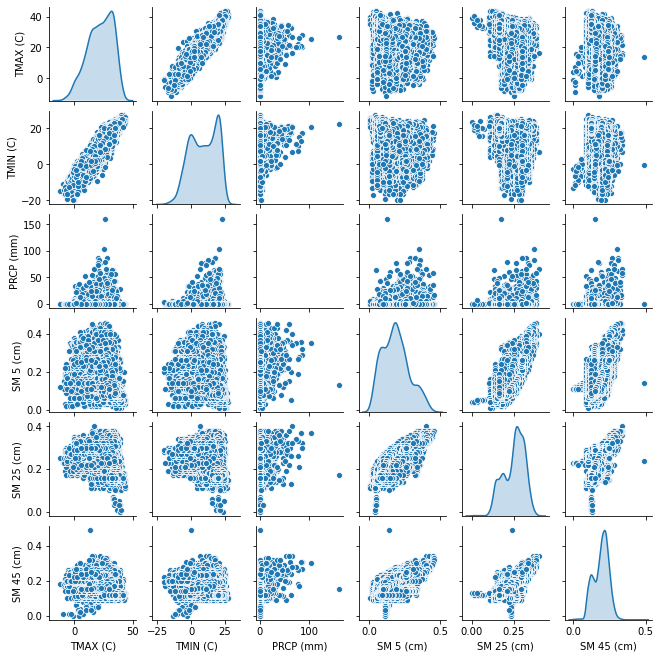

In [20]:
sns.pairplot(df_F108, diag_kind='kde', height=1.5)


### resample to weekly values and check correlation


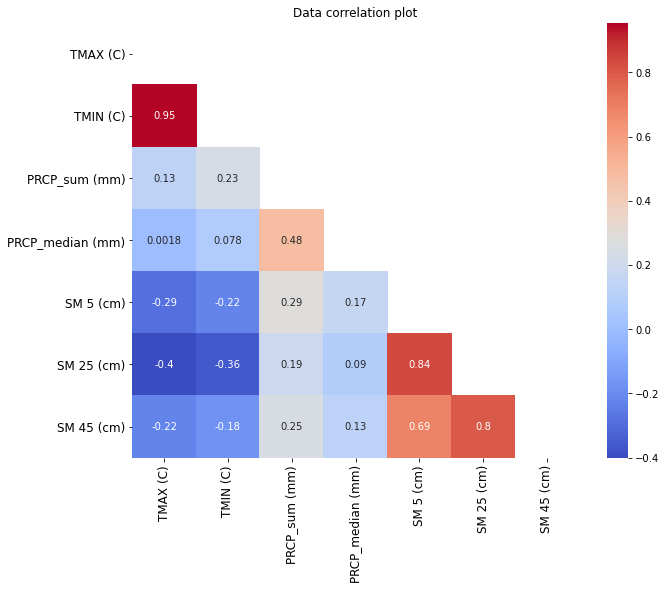

In [21]:
# Resample the temperature
resampled = df_F108[['TMAX (C)', "TMIN (C)"]].resample('W').median()
# Resample the Precipitation mean and median
resampled["PRCP_sum (mm)"] = df_F108["PRCP (mm)"].resample('W').sum()
resampled["PRCP_median (mm)"] = df_F108["PRCP (mm)"].resample('W').median()
# Resample the SM
resampled_SM = df_F108.iloc[:, 3:].resample('W').mean()
# The transformed precipitation mean and median

df_F108_resampled = resampled.merge(resampled_SM, on='Date', how="inner")


corr_plot(df_F108_resampled, 'Data correlation plot')


The pearson correlation shows that the resampled weekly mean PRCP (mm) has a higher correlation with other features than the median

Default bandwidth for data is 0; skipping density estimation.


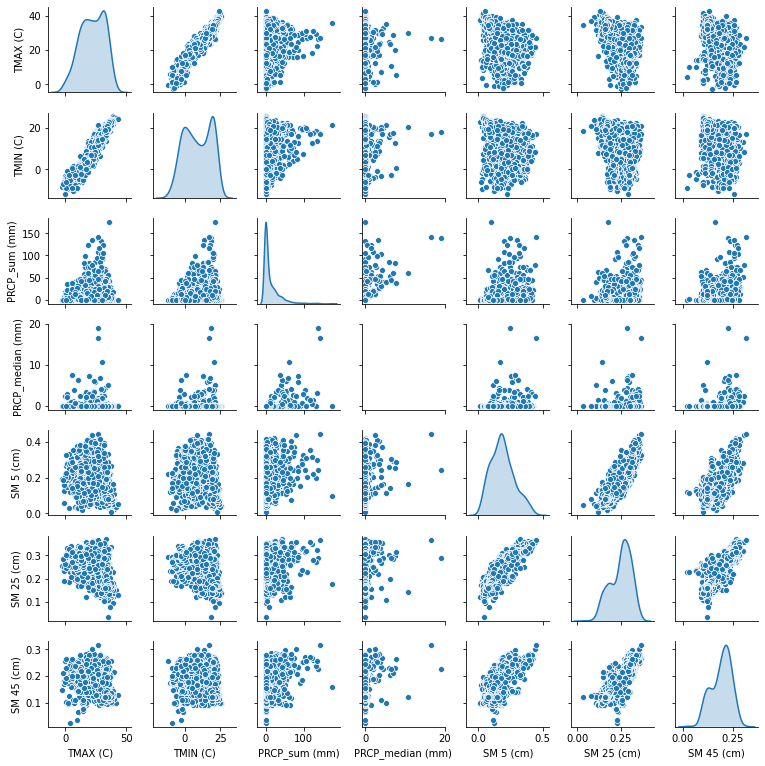

In [22]:
sns.pairplot(df_F108_resampled, diag_kind='kde', height=1.5)


# df_AI

In [23]:
df_AI = df_F108_resampled.drop(columns=["PRCP_median (mm)"])

df_AI = df_AI.rename(columns={"PRCP_sum (mm)": "$P [mm]$",
                              "TMAX (C)": "$T_{max}$ [$^oC$]",
                              "TMIN (C)": '$T_{min}$ [$^oC$]',
                              "SM 5 (cm)": "$SM_{5} [cm]$",
                              "SM 25 (cm)": "$SM_{25} [cm]$",
                              "SM 45 (cm)": "$SM_{45} [cm]$"})

#corr_plot(df_AI, 'DF_AI correlation plot')


In [24]:
df_AI['Month'] = df_AI.index.month

# Precipitation Lags
df_AI['$P^{lag1} [mm]$'] = df_AI["$P [mm]$"].shift(1)
df_AI['$P^{lag2} [mm]$'] = df_AI["$P [mm]$"].shift(2)


# Temperature Lags
#df_AI['$T_{max}^{lag1}$ [$^oC$]'] = df_AI['$T_{max}$ [$^oC$]'].shift(1)
#df_AI['$T_{max}^{lag2}$ [$^oC$]'] = df_AI['$T_{max}$ [$^oC$]'].shift(2)

#df_AI['$T_{min}^{lag1}$ [$^oC$]'] = df_AI['$T_{min}$ [$^oC$]'].shift(1)
#df_AI['$T_{min}^{lag2}$ [$^oC$]'] = df_AI['$T_{min}$ [$^oC$]'].shift(2)

# Soil Moisture Lags

#df_AI["$SM_{5}^{lag1}[cm]$"] = df_AI["$SM_{5} [cm]$"].shift(1)
#df_AI["$SM_{5}^{lag2}[cm]$"] = df_AI["$SM_{5} [cm]$"].shift(2)


In [25]:
prcp = df_AI.loc[:, df_AI.columns.str.startswith('$P')]
temp = df_AI.loc[:, df_AI.columns.str.startswith('$T')]
sm = df_AI.loc[:, df_AI.columns.str.startswith('$S')]


df_AI = temp.merge(prcp, on='Date').merge(sm, on="Date").dropna()


In [26]:
df_AI

,$T_{max}$ [$^oC$],$T_{min}$ [$^oC$],$P [mm]$,$P^{lag1} [mm]$,$P^{lag2} [mm]$,$SM_{5} [cm]$,$SM_{25} [cm]$,$SM_{45} [cm]$
Date,,,,,,,,
2005-09-11,32.777450,18.049820,4.06,0.00,41.40,0.101429,0.252857,0.214286
2005-09-18,29.988589,18.149818,73.15,4.06,0.00,0.167143,0.277143,0.225714
2005-09-25,33.788551,18.710924,0.00,73.15,4.06,0.127143,0.272857,0.222857
2005-10-02,28.399716,13.338755,29.72,0.00,73.15,0.121429,0.241429,0.205714
2005-10-09,23.860872,10.311008,24.64,29.72,0.00,0.171429,0.270000,0.200000
...,...,...,...,...,...,...,...,...
2020-12-06,12.549874,-2.299977,0.76,6.09,8.64,0.240000,0.295714,0.220000
2020-12-13,18.377594,-1.299987,3.30,0.76,6.09,0.230000,0.290000,0.220000
2020-12-20,7.838811,-2.638863,12.70,3.30,0.76,0.260000,0.298571,0.237143


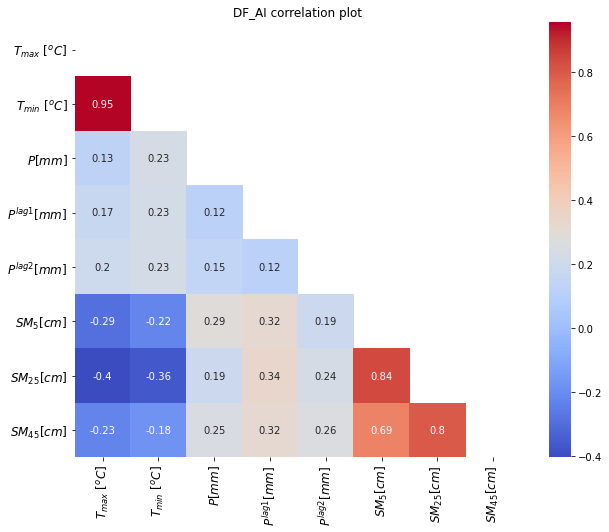

In [27]:
corr_plot(df_AI, 'DF_AI correlation plot')


## Build Model Pipeline

# Predicting soil moisture at 5 cm

In [28]:
X = df_AI.iloc[:, :-3].values
y = df_AI.iloc[:, -3].values # SM 5cm


X_train, X_test, y_train, y_test = train_test_split( X, 
                                                    y.ravel(),
                                                     test_size=0.3)
                                                     

pipeline_RF = Pipeline([('RandomForest', RandomForestRegressor())])
pipeline_XGB = Pipeline([('XGBoost', XGBRegressor())])
pipeline_ExTree = Pipeline([('ExtraTree', ExtraTreesRegressor())])
pipeliner = [pipeline_RF, pipeline_XGB, pipeline_ExTree]


#model = pipeline_RF.fit(X_train, y_train)


In [29]:
def results(x, y, x_t, y_t, pipelines):
    table = PrettyTable()

    # Fit the pipelines
    [pipe.fit(x, y) for pipe in pipelines]

    pipe_dict = {0: 'RandomForest', 1: 'XGBoost', 2: 'ExtraTree'}

    results = [[pipe_dict[i],
                np.round(r2_score(y, model.predict(x)), decimals=2),
                np.round(np.sqrt(mean_squared_error(y, model.predict(x))), decimals=2)]
               for i, model in enumerate(pipelines)]
    table.title = 'Training set score'
    table.field_names = ['Algorithm', 'R-square', 'RMSE']
    table.add_rows(results)
    print(table)

    table = PrettyTable()

    #################################################################################################
    # Make predictions on testing data and test model accuracy
    #################################################################################################
    results2 = []
    model_results = {}
    i = 0
    count = 0
    for model in pipelines:
        history = np.empty(len(x_t))
        test_X = x_t[0].reshape(1, -1)
        history[0] = model.predict(test_X)

        for i in range(len(x_t)):

            #x_t[i+1][-2] = history[i]
            #x_t[i+1][-1] = x_t[i][-2]

            test_X = x_t[i+1].reshape(1, -1)
            history[i+1] = model.predict(test_X)
            i = i+1
            if i == (len(x_t)-1):
                break
        results2.append([model.steps[0][0],
                         np.round(
                             r2_score(np.sort(y_t), np.sort(history)), decimals=2),
                         np.round(np.sqrt(mean_squared_error(np.sort(y_t), np.sort(history))), decimals=2)])
        model_results[model.steps[0][0]] = history
        count = count + 1

    table.title = 'Test set Score'
    table.field_names = ['Algorithm', 'R-square', 'RMSE']

    table.add_rows(results2)

    print(table)

    return model_results


In [30]:
holdem = results(X_train, y_train, X_test, y_test, pipeliner)


+--------------------------------+
|       Training set score       |
+--------------+----------+------+
|  Algorithm   | R-square | RMSE |
+--------------+----------+------+
| RandomForest |   0.91   | 0.03 |
|   XGBoost    |   0.71   | 0.05 |
|  ExtraTree   |   1.0    | 0.0  |
+--------------+----------+------+
+--------------------------------+
|         Test set Score         |
+--------------+----------+------+
|  Algorithm   | R-square | RMSE |
+--------------+----------+------+
| RandomForest |   0.89   | 0.03 |
|   XGBoost    |   0.9    | 0.03 |
|  ExtraTree   |   0.89   | 0.03 |
+--------------+----------+------+


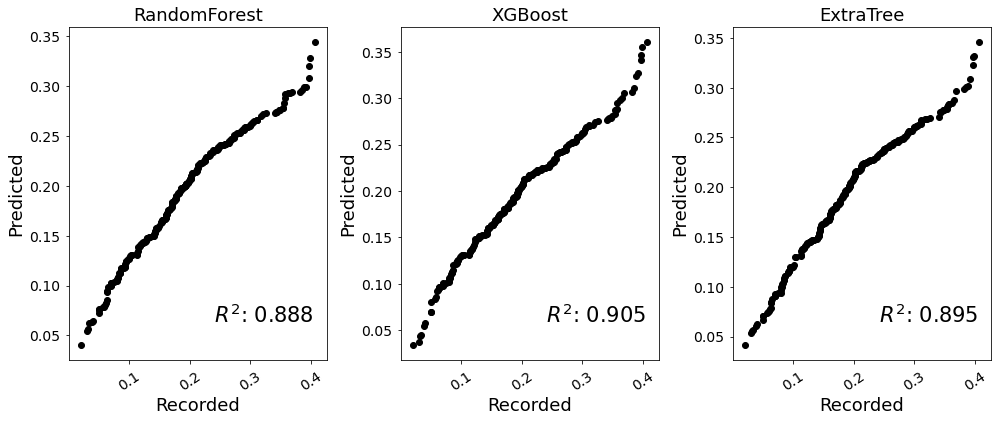

In [31]:
fig, ax = plt.subplots(1, 3, figsize=(14, 6))
# ###################################################################################################

for count, model_name in enumerate(holdem):

    ax[count].scatter(np.sort(y_test), np.sort(holdem[model_name]),
                      marker='o', color='black')

    RSQ = np.round((r2_score(np.sort(y_test), np.sort(holdem[model_name]))), 3)

    ax[count].text(0.95, 0.1, ("$R^2$: %0.03f" % RSQ),
                   verticalalignment='bottom', horizontalalignment='right',
                   transform=ax[count].transAxes,
                   color='black', fontsize=21)

    ax[count].set_xlabel('Recorded', fontsize=18)
    ax[count].tick_params(axis="x", labelsize=14, rotation=34)
    ax[count].xaxis.set_tick_params(pad=5)
    ax[count].set_ylabel('Predicted', fontsize=18)
    ax[count].tick_params(axis="y", labelsize=14)
    ax[count].yaxis.set_tick_params(pad=5)
    ax[count].set_title(model_name, size=18)

    plt.tight_layout(pad=1.2)

plt.show()


 Randomforest gives the best results for the test result although performs the least on training 
 while the RMSE is equal for both the XGBoost and the Extratree

# Predicting soil moisture at 25 cm

In [32]:
X = df_AI.iloc[:, :-3].values
y = df_AI.iloc[:, -2].values # SM 25cm


X_train, X_test, y_train, y_test = train_test_split( X, 
                                                    y.ravel(),
                                                     test_size=0.3)
                                                     

pipeline_RF = Pipeline([('RandomForest', RandomForestRegressor())])
pipeline_XGB = Pipeline([('XGBoost', XGBRegressor())])
pipeline_ExTree = Pipeline([('ExtraTree', ExtraTreesRegressor())])
pipeliner = [pipeline_RF, pipeline_XGB, pipeline_ExTree]


#model = pipeline_RF.fit(X_train, y_train)


In [33]:

#################################################################################################
#################################################################################################

def results(x, y, x_t, y_t, pipelines):
    table = PrettyTable()

    # Fit the pipelines
    [pipe.fit(x, y) for pipe in pipelines]

    pipe_dict = {0: 'RandomForest', 1: 'XGBoost', 2: 'ExtraTree'}

    results = [[pipe_dict[i],
                np.round(r2_score(y, model.predict(x)), decimals=2),
                np.round(np.sqrt(mean_squared_error(y, model.predict(x))), decimals=2)]
               for i, model in enumerate(pipelines)]
    table.title = 'Training set score'
    table.field_names = ['Algorithm', 'R-square', 'RMSE']
    table.add_rows(results)
    print(table)

    table = PrettyTable()

    #################################################################################################
    # Make predictions on testing data and test model accuracy
    #################################################################################################
    results2 = []
    model_results = {}
    i = 0
    count = 0
    for model in pipelines:
        history = np.empty(len(x_t))
        test_X = x_t[0].reshape(1, -1)
        history[0] = model.predict(test_X)

        for i in range(len(x_t)):

            #x_t[i+1][-2] = history[i]
            #x_t[i+1][-1] = x_t[i][-2]

            test_X = x_t[i+1].reshape(1, -1)
            history[i+1] = model.predict(test_X)
            i = i+1
            if i == (len(x_t)-1):
                break
        results2.append([model.steps[0][0],
                         np.round(
                             r2_score(np.sort(y_t), np.sort(history)), decimals=2),
                         np.round(np.sqrt(mean_squared_error(np.sort(y_t), np.sort(history))), decimals=2)])
        model_results[model.steps[0][0]] = history
        count = count + 1

    table.title = 'Test set Score'
    table.field_names = ['Algorithm', 'R-square', 'RMSE']

    table.add_rows(results2)

    print(table)

    return model_results


#################################################################################################
#################################################################################################



In [34]:
holdem = results(X_train, y_train, X_test, y_test, pipeliner)

+--------------------------------+
|       Training set score       |
+--------------+----------+------+
|  Algorithm   | R-square | RMSE |
+--------------+----------+------+
| RandomForest |   0.93   | 0.02 |
|   XGBoost    |   0.76   | 0.03 |
|  ExtraTree   |   1.0    | 0.0  |
+--------------+----------+------+
+--------------------------------+
|         Test set Score         |
+--------------+----------+------+
|  Algorithm   | R-square | RMSE |
+--------------+----------+------+
| RandomForest |   0.88   | 0.02 |
|   XGBoost    |   0.88   | 0.02 |
|  ExtraTree   |   0.88   | 0.02 |
+--------------+----------+------+


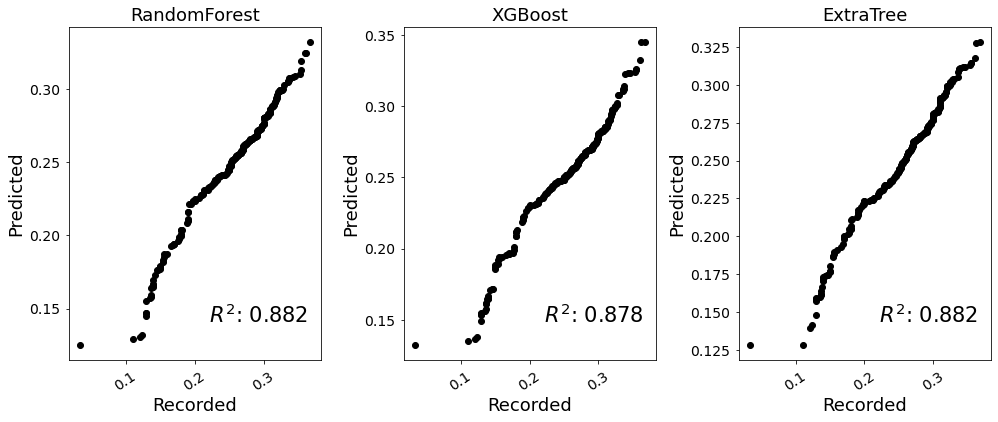

In [35]:

fig, ax = plt.subplots(1, 3, figsize=(14, 6))
# ###################################################################################################

for count, model_name in enumerate(holdem):

    ax[count].scatter(np.sort(y_test), np.sort(holdem[model_name]),
                      marker='o', color='black')

    RSQ = np.round((r2_score(np.sort(y_test), np.sort(holdem[model_name]))), 3)

    ax[count].text(0.95, 0.1, ("$R^2$: %0.03f" % RSQ),
                   verticalalignment='bottom', horizontalalignment='right',
                   transform=ax[count].transAxes,
                   color='black', fontsize=21)

    ax[count].set_xlabel('Recorded', fontsize=18)
    ax[count].tick_params(axis="x", labelsize=14, rotation=34)
    ax[count].xaxis.set_tick_params(pad=5)
    ax[count].set_ylabel('Predicted', fontsize=18)
    ax[count].tick_params(axis="y", labelsize=14)
    ax[count].yaxis.set_tick_params(pad=5)
    ax[count].set_title(model_name, size=18)

    plt.tight_layout(pad=1.2)

plt.show()


# Predicting soil moisture at 45 cm

In [36]:
X = df_AI.iloc[:, :-3].values
y = df_AI.iloc[:, -1].values # SM 45cm


X_train, X_test, y_train, y_test = train_test_split( X, 
                                                    y.ravel(),
                                                     test_size=0.3)
                                                     

pipeline_RF = Pipeline([('RandomForest', RandomForestRegressor())])
pipeline_XGB = Pipeline([('XGBoost', XGBRegressor())])
pipeline_ExTree = Pipeline([('ExtraTree', ExtraTreesRegressor())])
pipeliner = [pipeline_RF, pipeline_XGB, pipeline_ExTree]


#model = pipeline_RF.fit(X_train, y_train)


In [37]:

#################################################################################################
#################################################################################################

def results(x, y, x_t, y_t, pipelines):
    table = PrettyTable()

    # Fit the pipelines
    [pipe.fit(x, y) for pipe in pipelines]

    pipe_dict = {0: 'RandomForest', 1: 'XGBoost', 2: 'ExtraTree'}

    results = [[pipe_dict[i],
                np.round(r2_score(y, model.predict(x)), decimals=2),
                np.round(np.sqrt(mean_squared_error(y, model.predict(x))), decimals=2)]
               for i, model in enumerate(pipelines)]
    table.title = 'Training set score'
    table.field_names = ['Algorithm', 'R-square', 'RMSE']
    table.add_rows(results)
    print(table)

    table = PrettyTable()

    #################################################################################################
    # Make predictions on testing data and test model accuracy
    #################################################################################################
    results2 = []
    model_results = {}
    i = 0
    count = 0
    for model in pipelines:
        history = np.empty(len(x_t))
        test_X = x_t[0].reshape(1, -1)
        history[0] = model.predict(test_X)

        for i in range(len(x_t)):

            #x_t[i+1][-2] = history[i]
            #x_t[i+1][-1] = x_t[i][-2]

            test_X = x_t[i+1].reshape(1, -1)
            history[i+1] = model.predict(test_X)
            i = i+1
            if i == (len(x_t)-1):
                break
        results2.append([model.steps[0][0],
                         np.round(
                             r2_score(np.sort(y_t), np.sort(history)), decimals=2),
                         np.round(np.sqrt(mean_squared_error(np.sort(y_t), np.sort(history))), decimals=2)])
        model_results[model.steps[0][0]] = history
        count = count + 1

    table.title = 'Test set Score'
    table.field_names = ['Algorithm', 'R-square', 'RMSE']

    table.add_rows(results2)

    print(table)

    return model_results




In [38]:
#################################################################################################
#################################################################################################

holdem = results(X_train, y_train, X_test, y_test, pipeliner)



+--------------------------------+
|       Training set score       |
+--------------+----------+------+
|  Algorithm   | R-square | RMSE |
+--------------+----------+------+
| RandomForest |   0.89   | 0.02 |
|   XGBoost    |   0.65   | 0.03 |
|  ExtraTree   |   1.0    | 0.0  |
+--------------+----------+------+
+--------------------------------+
|         Test set Score         |
+--------------+----------+------+
|  Algorithm   | R-square | RMSE |
+--------------+----------+------+
| RandomForest |   0.9    | 0.01 |
|   XGBoost    |   0.9    | 0.01 |
|  ExtraTree   |   0.89   | 0.02 |
+--------------+----------+------+


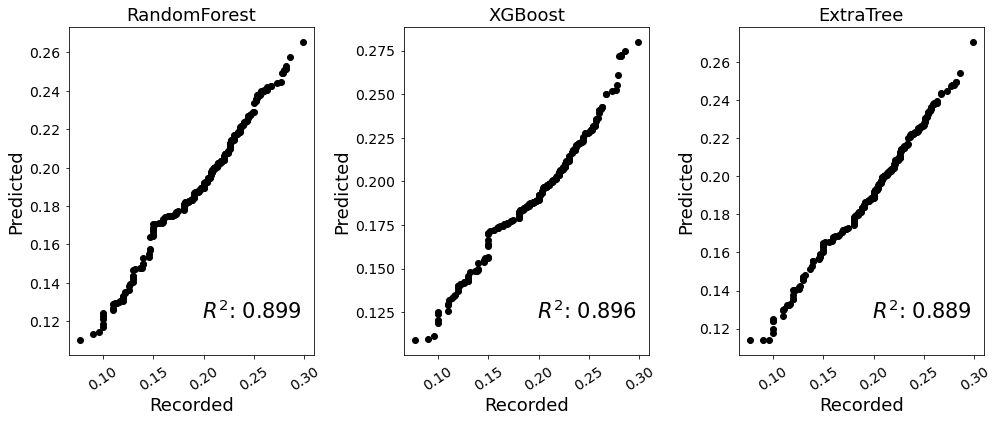

In [39]:
#################################################################################################
#################################################################################################

fig, ax = plt.subplots(1, 3, figsize=(14, 6))
# ###################################################################################################

for count, model_name in enumerate(holdem):

    ax[count].scatter(np.sort(y_test), np.sort(holdem[model_name]),
                      marker='o', color='black')

    RSQ = np.round((r2_score(np.sort(y_test), np.sort(holdem[model_name]))), 3)

    ax[count].text(0.95, 0.1, ("$R^2$: %0.03f" % RSQ),
                   verticalalignment='bottom', horizontalalignment='right',
                   transform=ax[count].transAxes,
                   color='black', fontsize=21)

    ax[count].set_xlabel('Recorded', fontsize=18)
    ax[count].tick_params(axis="x", labelsize=14, rotation=34)
    ax[count].xaxis.set_tick_params(pad=5)
    ax[count].set_ylabel('Predicted', fontsize=18)
    ax[count].tick_params(axis="y", labelsize=14)
    ax[count].yaxis.set_tick_params(pad=5)
    ax[count].set_title(model_name, size=18)

    plt.tight_layout(pad=1.2)

plt.show()


## Shapley Analysis

In [40]:
current_directory = os.getcwd()
path_to_save = current_directory+r'/F108'
os.makedirs(path_to_save, exist_ok=True)

In [41]:
Features = list(df_AI.iloc[:, :-3].columns)
Features 

['$T_{max}$ [$^oC$]',
 '$T_{min}$ [$^oC$]',
 '$P [mm]$',
 '$P^{lag1} [mm]$',
 '$P^{lag2} [mm]$']

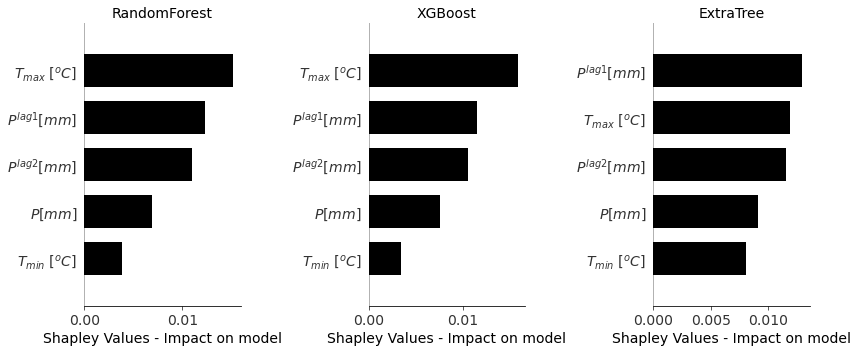

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

fig = plt.figure(tight_layout=True, figsize=(32, 5))
gs = gridspec.GridSpec(1, 3)
keep = {}
for count, model in enumerate(pipeliner):
    Modeled = model[0].fit(X, y.ravel())
    explainer = shap.TreeExplainer(Modeled)
    shap_values = explainer.shap_values(X)
    ax = fig.add_subplot(gs[0, count])
    shap.summary_plot(shap_values, X, Features, show=False,
                      plot_type="bar", color="black", plot_size=(12, 5))
    plt.xlabel('Shapley Values - Impact on model', fontsize=14)
    plt.tick_params(labelsize=14)
    # plt.ylabel(labelsize=16)
    plt.tight_layout(pad=1.2)
    plt.title(model.steps[0][0], fontsize=14)
    keep[model.steps[0][0]] = shap_values
    fig.align_labels()  # same as fig.align_xlabels(); fig.align_ylabels()

plt.savefig(path_to_save+r'/Histogram-importance.jpg',
            format='jpeg', dpi=300, bbox_inches='tight')
plt.show()


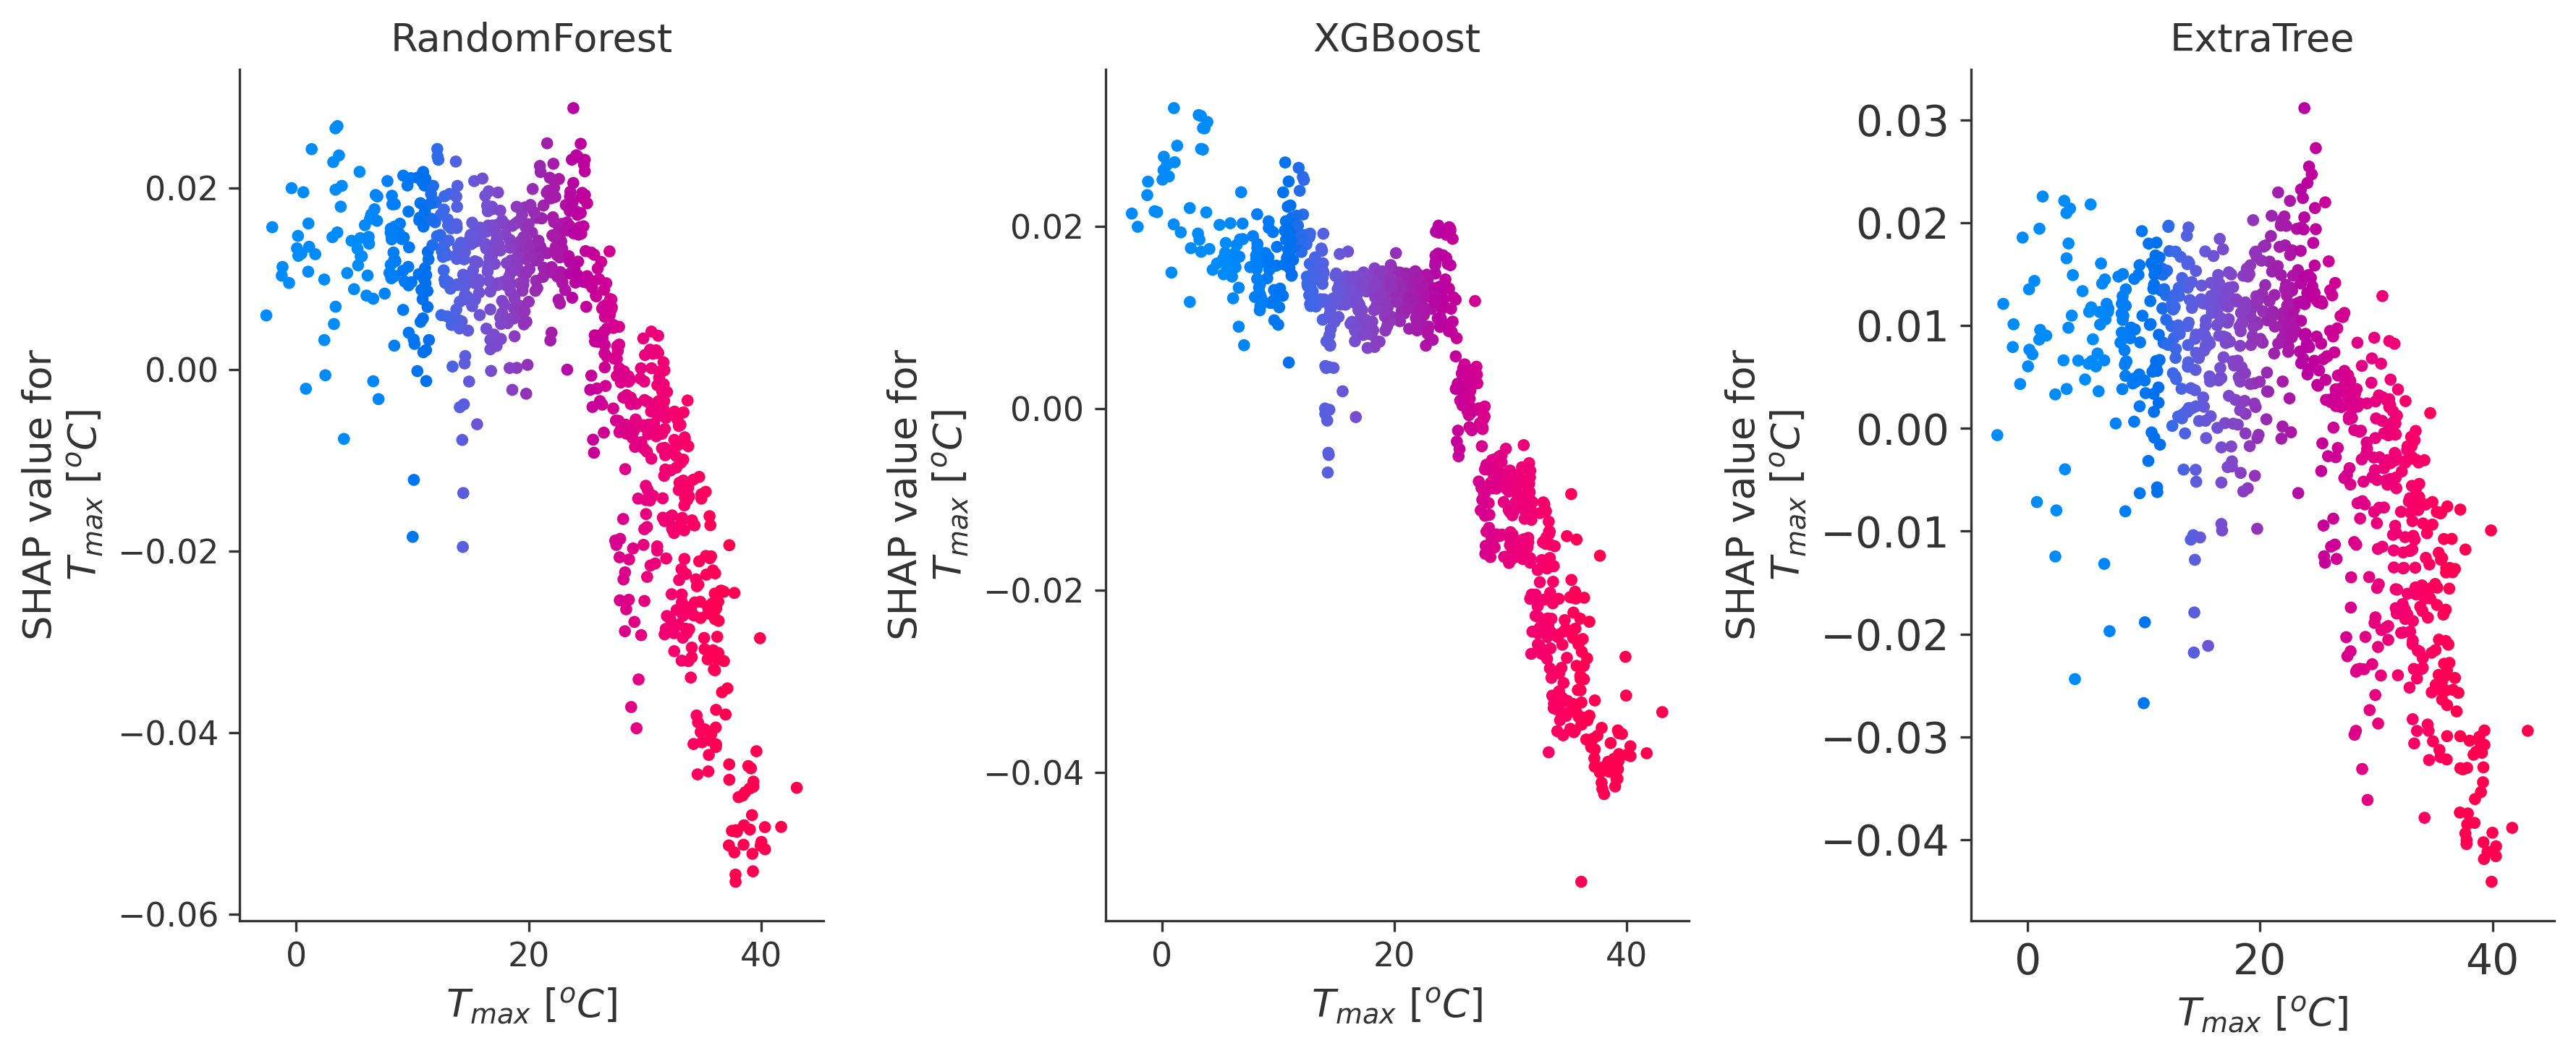

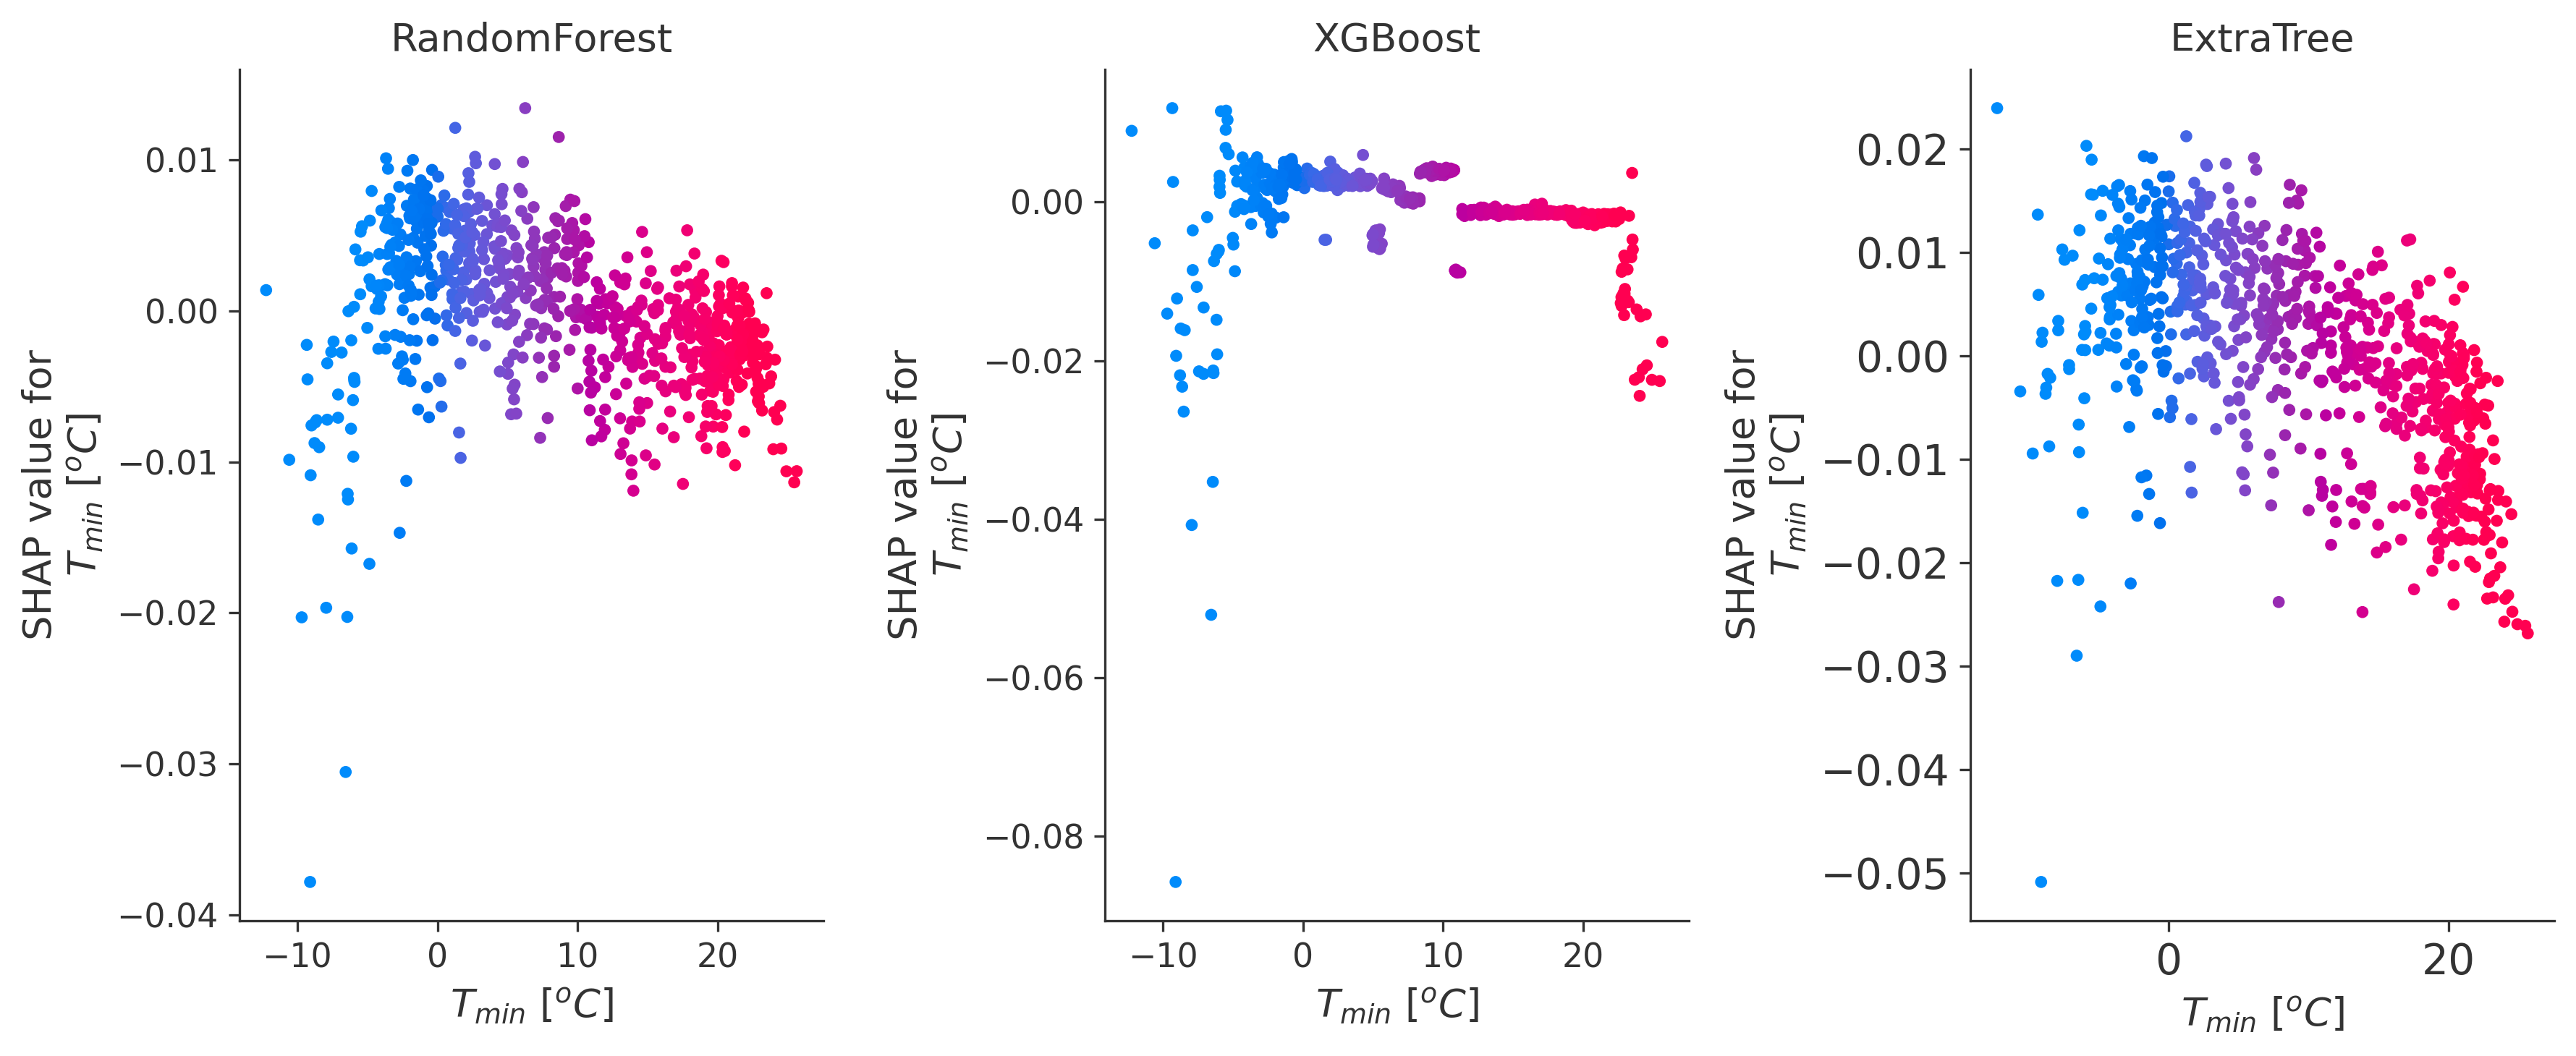

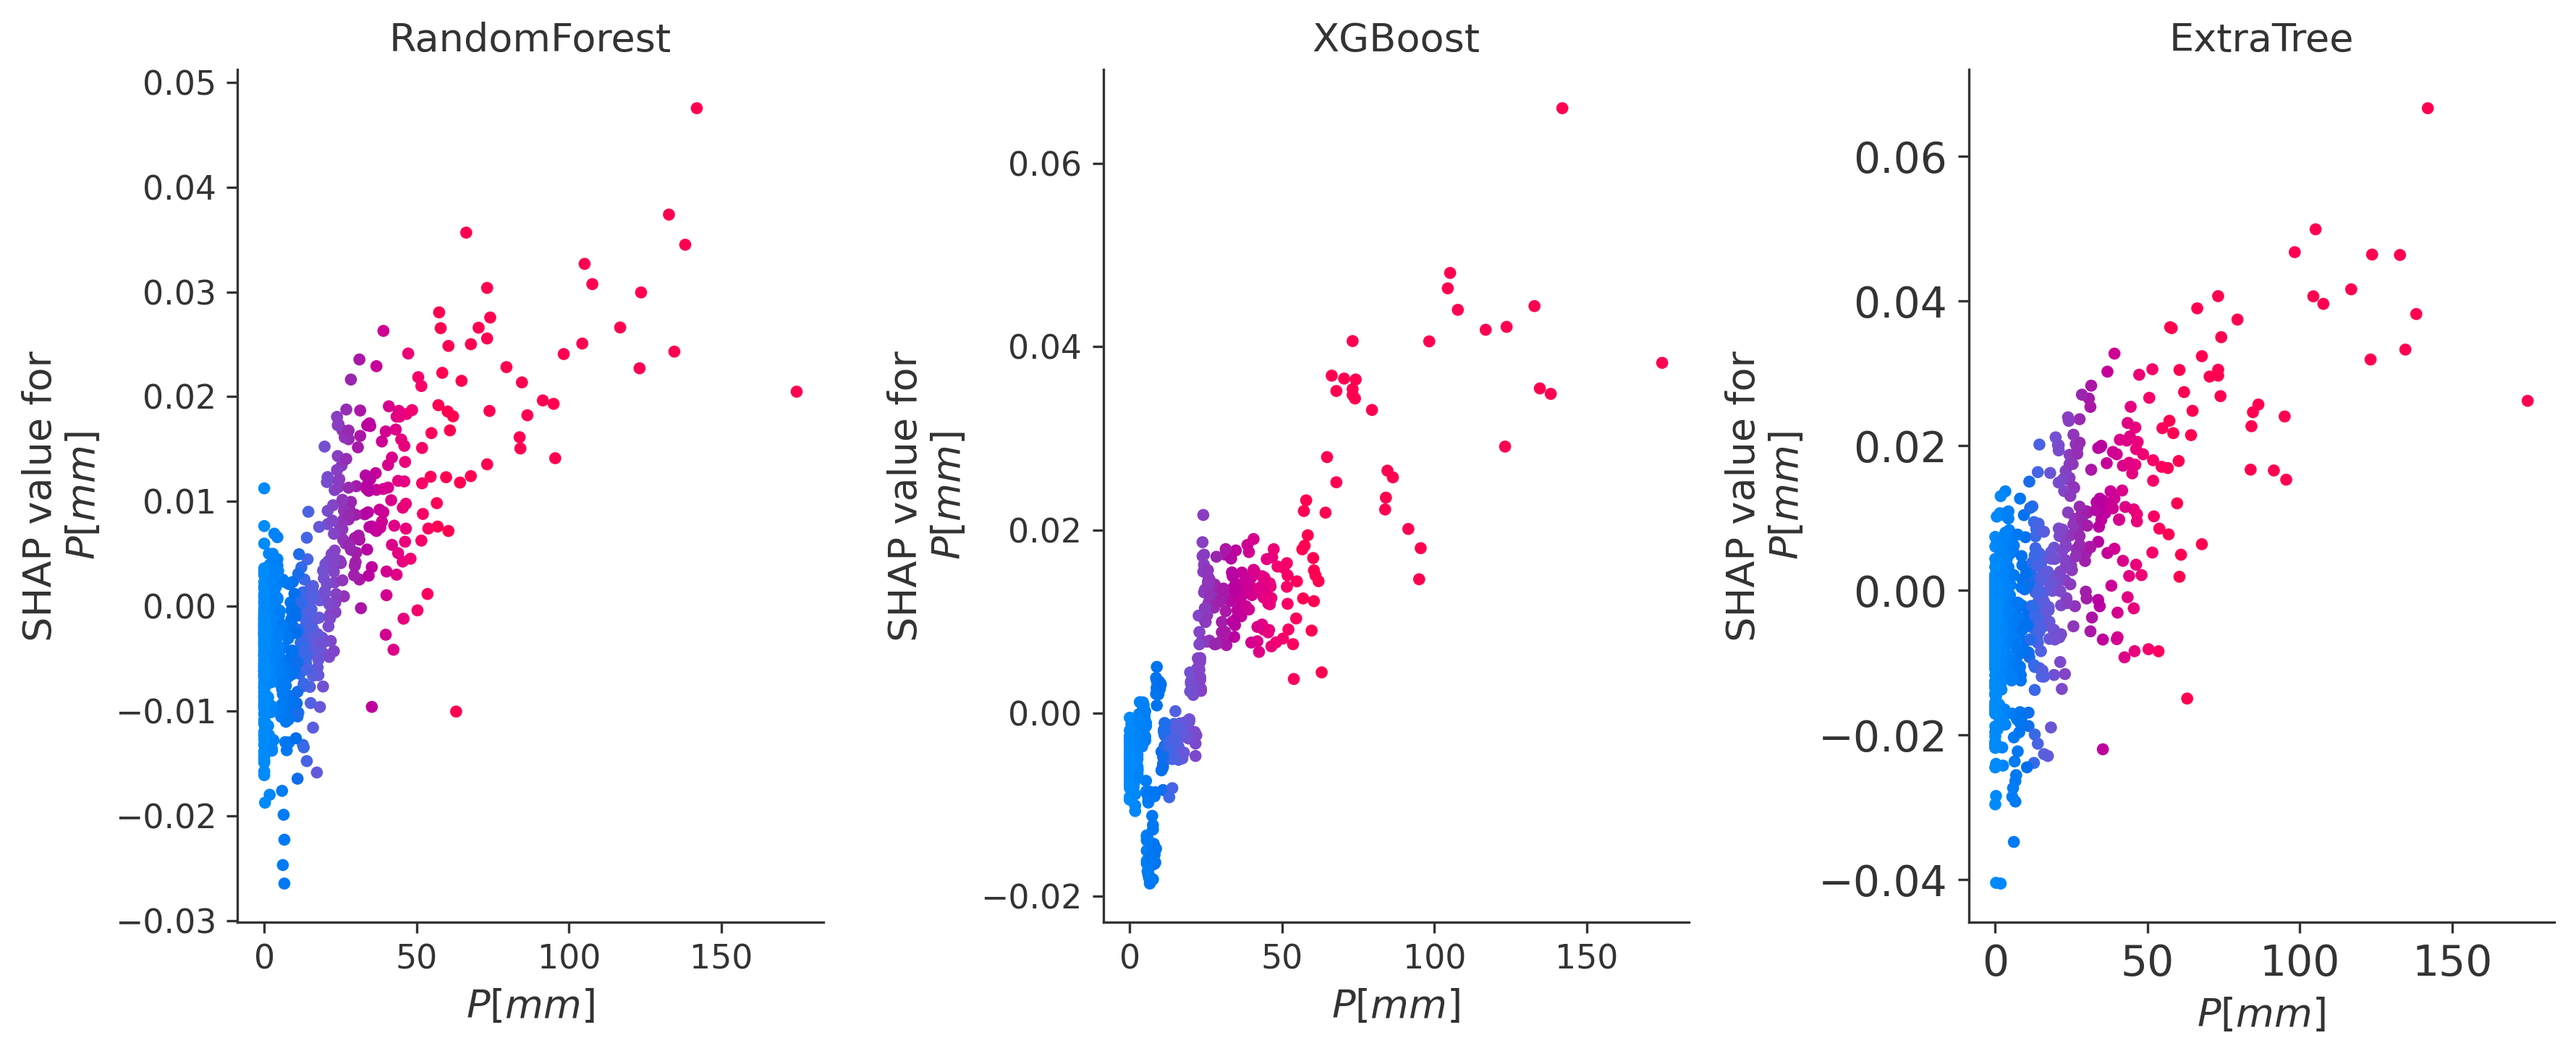

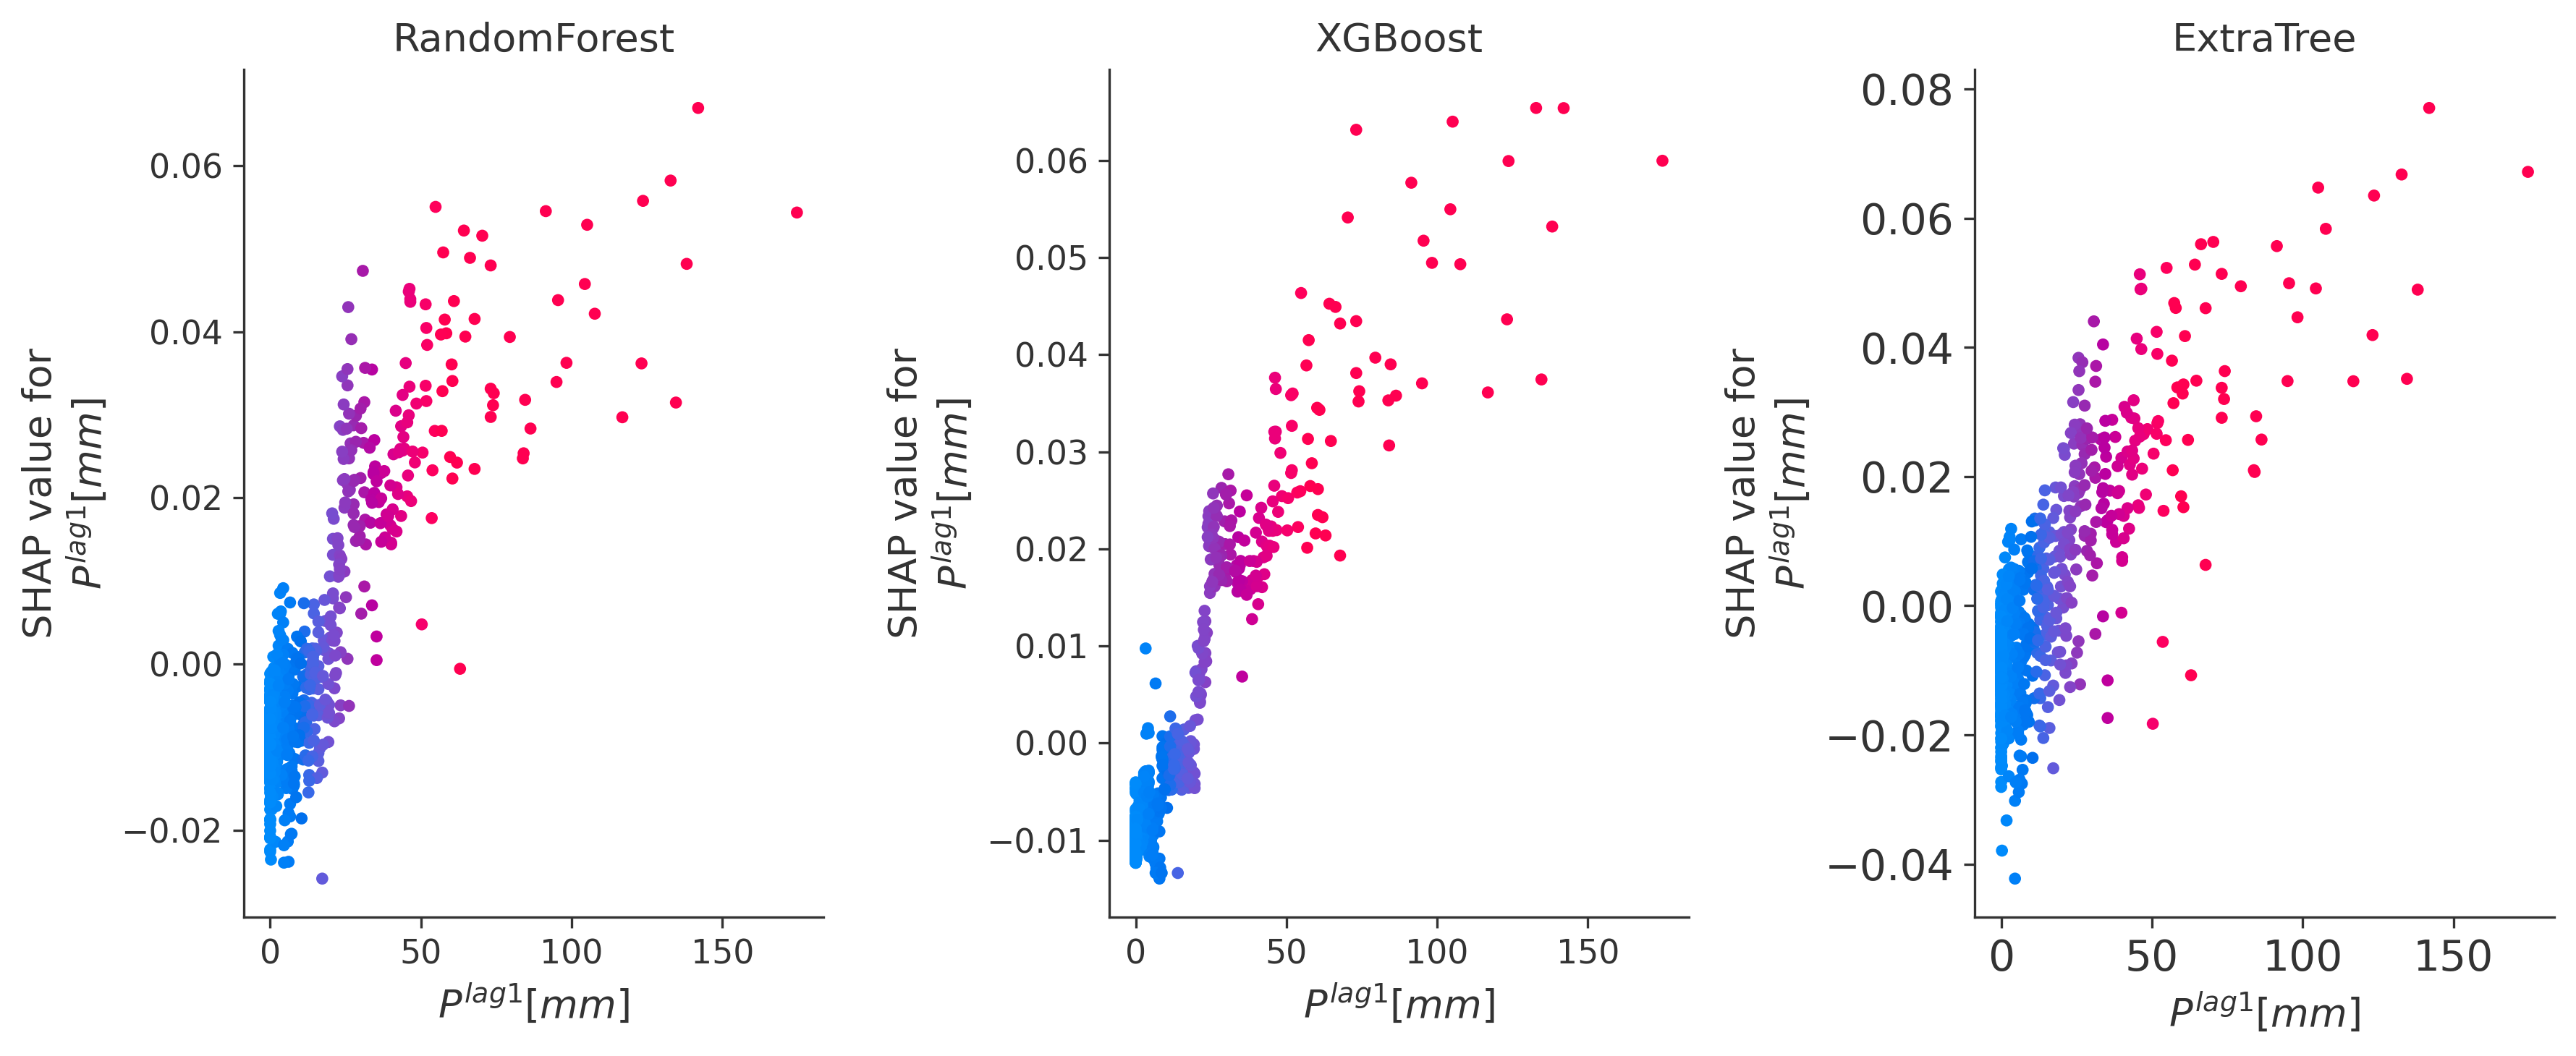

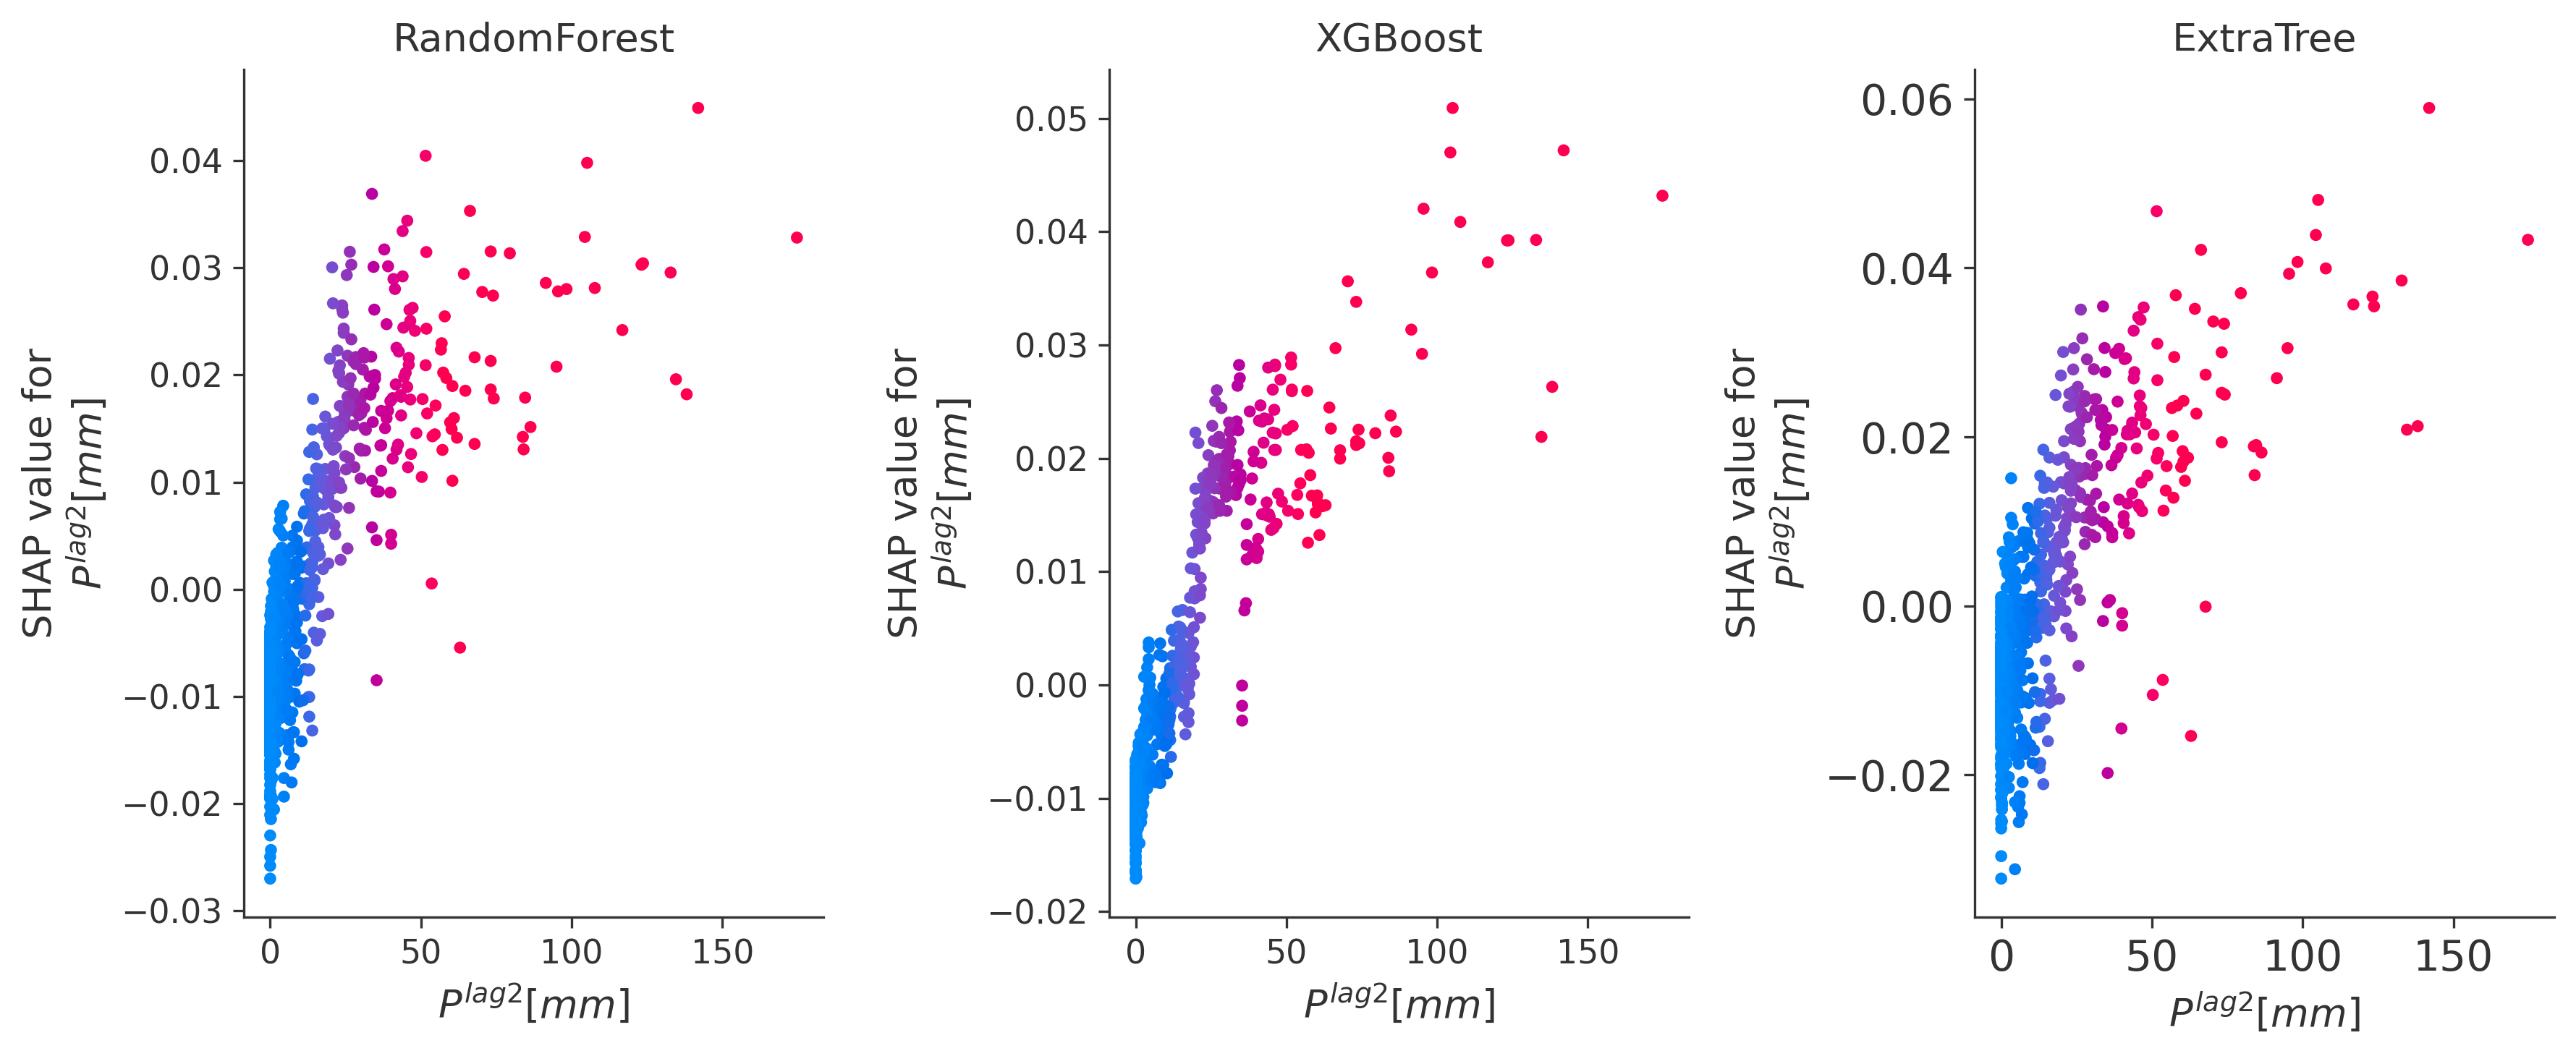

In [43]:
for i in Features:
    fig, ax = plt.subplots(1, 3, figsize=(12, 5), dpi=300)
    for count, j in enumerate(keep):
        shap.dependence_plot(i, keep[j], X, Features, ax=ax[count], show=False,
                             interaction_index=i, title=j)
        #ax[count].title(j, fontsize=14)
        plt.tick_params(labelsize=14)
        # plt.ylabel(labelsize=16)
        plt.tight_layout(pad=1.2)
        plt.savefig(path_to_save+r'/Feature Interaction_' + str(i)+'.jpg',
                    format='jpeg', dpi=300, bbox_inches='tight')


The above feature dependency plot is to be improved as we get more data. 